In [44]:
import pandas as pd
import datetime
import numpy as np
pd.set_option("display.max_columns",80)
pd.set_option("display.max_rows",70000)
import progressbar as pb
from progressbar import ProgressBar, Percentage, Bar, ETA, FileTransferSpeed
import time


from IPython.display import HTML,display

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
traffic_logs=pd.read_csv('../Collecting logs and Building Feature Set/Traffic_logs_Oct_Nov_Dec.csv',low_memory=True,memory_map=False)

In [15]:
traffic_logs.fillna(value=0,inplace=True)

traffic_logs['Bytes_sent']=traffic_logs['Bytes_sent'].astype(float)

traffic_logs['Bytes_received']=traffic_logs['Bytes_received'].astype(float)

traffic_logs['Elapsed_Time']=traffic_logs['Elapsed_Time'].astype(float)

# Check for errors in type casting
traffic_logs[pd.to_datetime(traffic_logs['Received_Time'], errors='coerce').isnull()]

,Received_Time,Source_IP,Destination_IP,Source_User,Application,Source_Port,Destination_Port,Bytes_sent,Bytes_received,Elapsed_Time,Packets Sent,Packets Received


In [16]:
traffic_logs.Received_Time=pd.to_datetime(traffic_logs.Received_Time,errors='coerce')

traffic_logs['month']=traffic_logs.Received_Time.dt.month
traffic_logs=traffic_logs[traffic_logs.month!=12]

len(traffic_logs)

traffic_logs_1=traffic_logs[(traffic_logs.Received_Time.dt.date<=datetime.date(2017,11,21))]

print(len(traffic_logs_1))
traffic_logs_1.Received_Time.dt.date.value_counts()

In [23]:
traffic_logs_1.to_csv('Traffic_Logs_Nov_21.csv')

In [24]:
threat_logs=pd.read_csv('../Threat Logs/Threat_Logs_Sept_26_Dec_23.csv')
threat_logs.Received_Time=pd.to_datetime(threat_logs.Received_Time,errors='coerce')

threat_logs['month']=threat_logs.Received_Time.dt.month
threat_logs=threat_logs[threat_logs.month!=12]


threat_logs=threat_logs[(threat_logs.Received_Time.dt.date<=datetime.date(2017,11,21))]

print(len(threat_logs))
threat_logs.Received_Time.dt.date.value_counts()

14621


2017-10-05    370
2017-10-04    359
2017-10-03    358
2017-10-01    349
2017-10-18    334
2017-09-28    334
2017-09-30    331
2017-09-29    329
2017-10-09    324
2017-09-27    306
2017-10-17    304
2017-10-12    303
2017-11-01    290
2017-10-06    287
2017-10-07    285
2017-10-10    285
2017-10-20    284
2017-10-28    283
2017-11-10    282
2017-10-11    281
2017-10-19    279
2017-10-24    278
2017-10-14    278
2017-11-20    276
2017-10-27    274
2017-10-23    273
2017-10-21    269
2017-10-08    268
2017-10-15    268
2017-10-13    267
2017-10-22    266
2017-10-30    265
2017-10-16    265
2017-10-25    262
2017-10-26    257
2017-11-21    246
2017-11-09    246
2017-10-29    245
2017-11-05    241
2017-11-14    240
2017-11-12    233
2017-11-03    229
2017-11-17    229
2017-11-15    220
2017-11-19    209
2017-11-06    207
2017-11-02    207
2017-11-13    205
2017-11-18    192
2017-10-02    189
2017-11-16    187
2017-10-31    186
2017-11-11    152
2017-11-08    149
2017-11-07    107
2017-11-04

In [25]:
threat_logs.to_csv('Threat_Logs_Nov_21.csv')

In [27]:
traffic_logs=traffic_logs_1.copy()

In [28]:
print("Total number of traffic logs generated from {} to {} are {}".format(traffic_logs.Received_Time.min(),
                                                                   traffic_logs.Received_Time.max(),len(traffic_logs)),"\n")
print("\n{} unique users exist in the Traffic Logs".format(traffic_logs.Source_User.nunique()))

Total number of traffic logs generated from 2017-09-25 23:42:10 to 2017-11-21 23:59:54 are 66561686 


53165 unique users exist in the Traffic Logs


In [29]:
print("Total number of threat logs generated from {} to {} are {}".format(threat_logs.Received_Time.min(),
                                                                   threat_logs.Received_Time.max(),len(threat_logs)),"\n")
print("Unique users in threat logs:",threat_logs.Source_User.nunique())

Total number of threat logs generated from 2017-09-26 19:59:22 to 2017-11-21 23:59:25 are 14621 

Unique users in threat logs: 1935


In [31]:
b=threat_logs.Source_User.unique()
count=0
c=traffic_logs.Source_User.unique()
d=[]
for i in range(0,len(b)):
    if b[i] not in c:
        count=count+1
        print(b[i])
        d.append(b[i])
    else:
        continue
for i in range(0,len(d)):
    threat_logs=threat_logs[threat_logs.Source_User!=d[i]]

e0027ef4773a01094339852b6b1207f38c22adbe46879a9faf490413b580caab
bb55d0daf6d89297b9a3af725850bb5c387364a97983b7486270e590177a885b
e
d0e4a472a56ed031ed5063b27df8d14e7c55fa68c35995364be2091f1230945a
bc6
b82653e4eea7bf3b0678c1e4143e64046f6132d82164d4c0c14d5fa993fda8af
a853912a4a8388076c4f4ac1c538eacc91df42855e101a1a6532a5f4fbe4886f
d4832c2bc451a51c102bc8c8a565af5b8ad5473fa3236d88fcb228f684893071
87adeb8c57350f38c82e462ec65da91789c462
86ee1ce9
21c0bfba539e0bc6
e0027ef4773a01094339852b6b1207f38c22a


In [32]:
x=traffic_logs[traffic_logs.Source_User.isin(threat_logs.Source_User.unique())]

In [33]:
x_threat=threat_logs[['Source_User','Received_Time','Source_IP','Destination_IP']]

In [34]:
widgets = ['Test: ', Percentage(), ' ',Bar(marker='|',left='[',right=']'),' ', ETA(), ' ', FileTransferSpeed()]
pbar = ProgressBar(widgets=widgets, maxval=len(threat_logs))
    

threat_sub_logs=x_threat.iloc[:,:]
threat_df=pd.DataFrame(columns=['User','Reason'])
ls=[]
count_no_date=0
count_no_time=0
count_no_time_min=0
corner_case=0
main=0
index_matched=[]
not_matched=[]

c=0

pbar.start()

for i in range(0,len(threat_sub_logs)):
    threat=threat_sub_logs.iloc[i,:]
    ### Match User
    filter_user=x[x.Source_User==threat.Source_User]    

    ### Filter Date for present day and a day before as threat might be recorded later
    if((threat.Received_Time.day==1)&(threat.Received_Time.month in [1,5,7,8,10,12])):
        filter_48=filter_user[(filter_user.Received_Time.dt.day==threat.Received_Time.day) | 
                              (filter_user.Received_Time.dt.day==30)| 
                              ((filter_user.Received_Time.dt.day==29)&
                               (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                              (filter_user.Received_Time.dt.day==threat.Received_Time.day+1)|
                           ((filter_user.Received_Time.dt.day==threat.Received_Time.day+2)& 
                           (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
        
    if((threat.Received_Time.day==2)&(threat.Received_Time.month in [1,5,7,8,10,12])):
        filter_48=filter_user[(filter_user.Received_Time.dt.day==threat.Received_Time.day) | 
                           (filter_user.Received_Time.dt.day==1)| 
                           ((filter_user.Received_Time.dt.day==30)& 
                           (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                           (filter_user.Received_Time.dt.day==threat.Received_Time.day+1)|
                           ((filter_user.Received_Time.dt.day==threat.Received_Time.day+2)& 
                           (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
        
    if((threat.Received_Time.day==2)&(threat.Received_Time.month in [2,4,6,9,11])):
        filter_48=filter_user[(filter_user.Received_Time.dt.day==threat.Received_Time.day) | 
                           ((filter_user.Received_Time.dt.day==1)& 
                           (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))| 
                           ((filter_user.Received_Time.dt.day==31)& 
                           (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                           ((filter_user.Received_Time.dt.day==threat.Received_Time.day+1)& 
                           (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))|
                           ((filter_user.Received_Time.dt.day==threat.Received_Time.day+2)& 
                           (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
        
    if((threat.Received_Time.day==1)&(threat.Received_Time.month in [2,4,6,9,11])):
        filter_48=filter_user[(filter_user.Received_Time.dt.day==threat.Received_Time.day) | 
                           ((filter_user.Received_Time.dt.day==31))| 
                           ((filter_user.Received_Time.dt.day==30)& 
                           (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                           (filter_user.Received_Time.dt.day==threat.Received_Time.day+1)|
                           ((filter_user.Received_Time.dt.day==threat.Received_Time.day+2)& 
                           (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
        
        
    if((threat.Received_Time.day==31)):
        filter_48=filter_user[(filter_user.Received_Time.dt.day==threat.Received_Time.day) | 
                           (filter_user.Received_Time.dt.day==30)| 
                           ((filter_user.Received_Time.dt.day==29)& 
                           (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                           (filter_user.Received_Time.dt.day==1)|
                           ((filter_user.Received_Time.dt.day==2)& 
                           (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
        
    if((threat.Received_Time.day==30) & (threat.Received_Time.month in [1,5,7,8,10,12])):
        filter_48=filter_user[(filter_user.Received_Time.dt.day==threat.Received_Time.day) | 
                           (filter_user.Received_Time.dt.day==29)| 
                           ((filter_user.Received_Time.dt.day==28)& 
                           (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                           (filter_user.Received_Time.dt.day==31)|
                           ((filter_user.Received_Time.dt.day==1)& 
                           (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
        
    if((threat.Received_Time.day==30) & (threat.Received_Time.month in [2,4,6,9,11])):
        filter_48=filter_user[(filter_user.Received_Time.dt.day==threat.Received_Time.day) | 
                           (filter_user.Received_Time.dt.day==29)| 
                           ((filter_user.Received_Time.dt.day==28)& 
                           (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                           (filter_user.Received_Time.dt.day==1)|
                           ((filter_user.Received_Time.dt.day==2)& 
                           (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
        
    if((threat.Received_Time.day==29) & (threat.Received_Time.month in [2,4,6,9,11])):
        filter_48=filter_user[(filter_user.Received_Time.dt.day==threat.Received_Time.day) | 
                           (filter_user.Received_Time.dt.day==28)| 
                           ((filter_user.Received_Time.dt.day==27)& 
                           (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                           (filter_user.Received_Time.dt.day==30)|
                           ((filter_user.Received_Time.dt.day==1)& 
                           (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
    else:
        filter_48=filter_user[(filter_user.Received_Time.dt.day==threat.Received_Time.day) | 
                           (filter_user.Received_Time.dt.day==threat.Received_Time.day-1)| 
                           ((filter_user.Received_Time.dt.day==threat.Received_Time.day-2)& 
                           (filter_user.Received_Time.dt.hour>=threat.Received_Time.hour))|
                           (filter_user.Received_Time.dt.day==threat.Received_Time.day+1)|
                           ((filter_user.Received_Time.dt.day==threat.Received_Time.day+2)& 
                           (filter_user.Received_Time.dt.hour<=threat.Received_Time.hour))]
        
    

    filter_ip=filter_48[(filter_48.Source_IP==threat.Source_IP) | (filter_48.Destination_IP==threat.Destination_IP)]
    
    
        
    if len(filter_ip)==0:
        not_matched.append(i)
        ls.append([threat.Source_User,"Mismatch"])
    else:
        a=(threat.Received_Time-filter_ip.Received_Time).argmin()
        index_matched.append(a)
        ls.append([threat.Source_User,"Found"])  
        
    time.sleep(0.01)
    pbar.update(i+1)
pbar.finish()

Test: 100% [||||||||||||||||||||||||||||||||||||||||||] Time: 3:30:07   1.0 B/s


In [35]:
threat_df=pd.DataFrame(ls)
threat_df[1].value_counts()

Found       12540
Mismatch       28
Name: 1, dtype: int64

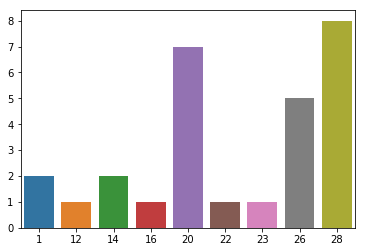

In [38]:
not_found=threat_df[threat_df[1]!='Found']
a=not_found.index.get_values()
not_found_df=threat_logs.iloc[a,:]
sns.barplot(x=not_found_df.Received_Time.dt.day.value_counts().index,y=not_found_df.Received_Time.dt.day.value_counts().values)

In [40]:
threat_logs.reset_index(inplace=True,drop=True)
p=threat_logs.iloc[not_matched,:]
p

,Received_Time,Subtype,Source_IP,Destination_IP,Source_User,Application,Repeat_Count,Source_Port,Destination_Port,Protocol,Action,Threat_ID,Category,Severity,Destination_Location,Something,device_name,Detailed_Subtype,Something_2,month
3,2017-09-26 20:09:01,vulnerability,10.104.124.147,216.9.242.240,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...,ssl,1.0,62334.0,443.0,tcp,reset-both,Microsoft Schannel Remote Code Execution Vulne...,not-resolved,medium,Canada,1.0,css-wireless-pa1,overflow,AppThreat-0-0,9
8,2017-09-26 20:24:13,vulnerability,10.104.124.147,216.9.242.240,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...,ssl,1.0,15880.0,443.0,tcp,reset-both,Microsoft Schannel Remote Code Execution Vulne...,not-resolved,medium,Canada,1.0,css-wireless-pa1,overflow,AppThreat-0-0,9
9,2017-09-26 20:30:20,vulnerability,10.104.250.103,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...,ssl,1.0,10382.0,443.0,tcp,reset-both,Microsoft Schannel Remote Code Execution Vulne...,not-resolved,medium,Canada,1.0,css-wireless-pa1,overflow,AppThreat-0-0,9
25,2017-09-26 21:43:26,vulnerability,10.104.124.147,216.9.242.240,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...,ssl,1.0,51122.0,443.0,tcp,reset-both,Microsoft Schannel Remote Code Execution Vulne...,not-resolved,medium,Canada,1.0,css-wireless-pa1,overflow,AppThreat-0-0,9
26,2017-09-26 21:43:32,vulnerability,10.104.124.147,216.9.242.240,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...,ssl,1.0,60064.0,443.0,tcp,reset-both,Microsoft Schannel Remote Code Execution Vulne...,not-resolved,medium,Canada,1.0,css-wireless-pa1,overflow,AppThreat-0-0,9
371,2017-09-28 20:38:19,vulnerability,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...,ssl,1.0,63511.0,443.0,tcp,reset-both,Microsoft Schannel Remote Code Execution Vulne...,not-resolved,medium,Canada,1.0,ptx-wireless-pa1,overflow,AppThreat-0-0,9
383,2017-09-28 20:38:19,vulnerability,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...,ssl,1.0,59073.0,443.0,tcp,reset-both,Microsoft Schannel Remote Code Execution Vulne...,not-resolved,medium,Canada,1.0,ptx-wireless-pa1,overflow,AppThreat-0-0,9
384,2017-09-28 20:38:19,vulnerability,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...,ssl,2.0,41045.0,443.0,tcp,reset-both,Microsoft Schannel Remote Code Execution Vulne...,not-resolved,medium,Canada,1.0,ptx-wireless-pa1,overflow,AppThreat-0-0,9
407,2017-09-28 20:38:19,vulnerability,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...,ssl,1.0,37618.0,443.0,tcp,reset-both,Microsoft Schannel Remote Code Execution Vulne...,not-resolved,medium,Canada,1.0,ptx-wireless-pa1,overflow,AppThreat-0-0,9
438,2017-09-28 20:38:19,vulnerability,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...,ssl,1.0,57921.0,443.0,tcp,reset-both,Microsoft Schannel Remote Code Execution Vulne...,not-resolved,medium,Canada,1.0,ptx-wireless-pa1,overflow,AppThreat-0-0,9


In [41]:
not_found[0].value_counts()

7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde555617690d99888591f    8
6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1bb69388379cb0bd759e    6
71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa669834d7d5741b8fb1    4
6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b442620e32bbda346bcb7    2
644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54bae13076c03da836d9    2
a3d1006e292aeae164243d4a73a956320af457e025df7e354d1e270d234eb9df    1
9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb25df4e554f81b89ec12    1
1ad56b600ea750df40475b00cbb8aeeded8b97d682b379c7f017f38d4cef6d4a    1
0427c8580bf057b1bf8c6c0ecdf72b768666afb0f332826f0e0c83f281c7e3ce    1
bf4bad43deb3b1a3647f7756fea72459b4a40335df48b035abf531c4d930a3bb    1
bd92060809ec33ba651bd63933ea574e7a9f50f739d2559bb73da08c43f4ae2d    1
Name: 0, dtype: int64

In [43]:
len(not_found[0].value_counts())

11

### For user 7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde555617690d99888591f  - Found 8 records within 96 hours with different source IP & destination IP

In [54]:
print("Record/s that did not matchd")
display(p[p.Source_User=='7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde555617690d99888591f'][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']])

Record/s that did not matchd


,Received_Time,Source_IP,Destination_IP,Source_User
371,2017-09-28 20:38:19,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
383,2017-09-28 20:38:19,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
384,2017-09-28 20:38:19,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
407,2017-09-28 20:38:19,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
438,2017-09-28 20:38:19,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
439,2017-09-28 20:38:19,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
455,2017-09-28 20:38:19,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
537,2017-09-28 21:15:02,10.105.15.129,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...


In [55]:
print("96 +/- hours")
x[(x.Source_User=='7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde555617690d99888591f')
          &((x.Received_Time.dt.day==28) | (x.Received_Time.dt.day==29) | (x.Received_Time.dt.day==30)
          | (x.Received_Time.dt.day==1) |(x.Received_Time.dt.day==2))
          &((x.Source_IP=='10.105.15.129') | (x.Destination_IP=='216.9.242.240'))]

96 +/- hours


,Received_Time,Source_IP,Destination_IP,Source_User,Application,Source_Port,Destination_Port,Bytes_sent,Bytes_received,Elapsed_Time,Packets Sent,Packets Received,month


In [56]:
print("30 days")
x[(x.Source_User=='7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde555617690d99888591f')
          &((x.Source_IP=='10.105.15.129') | (x.Destination_IP=='216.9.242.240'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

30 days


,Received_Time,Source_IP,Destination_IP,Source_User
12215073,2017-10-06 14:57:05,10.105.1.86,216.9.242.240,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...


In [58]:
print("30 days no restriction")
x[(x.Source_User=='7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde555617690d99888591f')][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

30 days no restriction


,Received_Time,Source_IP,Destination_IP,Source_User
402611,2017-09-26 07:59:14,10.105.2.167,23.196.136.87,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
441618,2017-09-26 08:00:02,10.105.2.167,68.171.242.98,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
798397,2017-09-26 16:59:13,10.105.164.222,128.8.74.2,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
874949,2017-09-26 17:59:29,10.105.164.222,17.248.143.25,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
877774,2017-09-26 17:59:29,10.105.164.222,17.248.143.25,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
877907,2017-09-26 17:59:29,10.105.164.222,128.8.74.2,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
878563,2017-09-26 17:59:30,10.105.164.222,128.8.74.2,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
880566,2017-09-26 17:59:30,10.105.164.222,128.8.74.2,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
880966,2017-09-26 17:59:30,10.105.164.222,128.8.76.2,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...
1677153,2017-09-27 09:59:58,10.105.5.94,128.8.74.2,7c1c60bc43c7c095891ddf09dc36e613cfd05d98c7cde5...


### For user 6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1bb69388379cb0bd759e - Found 6 records within 96 hours with different source IP and destination IP

In [66]:
print("Record/s that did not matchd")
display(p[p.Source_User=='6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1bb69388379cb0bd759e'][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']])

Record/s that did not matchd


,Received_Time,Source_IP,Destination_IP,Source_User
12189,2017-11-20 22:12:59,10.105.237.165,216.9.242.240,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
12192,2017-11-20 22:12:59,10.105.237.165,216.9.242.240,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
12218,2017-11-20 22:12:59,10.105.237.165,216.9.242.240,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
12228,2017-11-20 22:12:59,10.105.237.165,216.9.242.240,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
12229,2017-11-20 22:12:59,10.105.237.165,216.9.242.240,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
12231,2017-11-20 22:12:59,10.105.237.165,216.9.242.240,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...


In [67]:
print("96 +/- hours")
x[(x.Source_User=='6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1bb69388379cb0bd759e')
          &((x.Received_Time.dt.day==20) 
          | (x.Received_Time.dt.day==21) | (x.Received_Time.dt.day==22) | (x.Received_Time.dt.day==23) | (x.Received_Time.dt.day==24)
          | (x.Received_Time.dt.day==19) | (x.Received_Time.dt.day==18) | (x.Received_Time.dt.day==17) | (x.Received_Time.dt.day==16))
          &((x.Source_IP=='10.105.237.165') | (x.Destination_IP=='216.9.242.240'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

96 +/- hours


,Received_Time,Source_IP,Destination_IP,Source_User
31925198,2017-10-23 10:56:09,10.104.226.34,216.9.242.240,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...


In [68]:
print("30 days")
x[(x.Source_User=='6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1bb69388379cb0bd759e')
  &((x.Source_IP=='10.105.237.165') | (x.Destination_IP=='216.9.242.240'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

30 days


,Received_Time,Source_IP,Destination_IP,Source_User
7737055,2017-10-02 16:58:24,10.104.227.67,216.9.242.240,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
9847354,2017-10-04 13:58:59,10.104.238.222,216.9.242.240,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
12096242,2017-10-06 11:59:17,10.105.228.134,216.9.242.240,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
31925198,2017-10-23 10:56:09,10.104.226.34,216.9.242.240,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
59188808,2017-11-15 14:59:34,10.105.237.92,216.9.242.240,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...


In [69]:
print("30 days no restriction")
x[(x.Source_User=='6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1bb69388379cb0bd759e')][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

30 days no restriction


,Received_Time,Source_IP,Destination_IP,Source_User
549022,2017-09-26 10:59:38,10.104.223.76,23.0.210.224,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
559543,2017-09-26 10:59:44,10.104.223.76,31.13.69.229,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
566575,2017-09-26 10:59:55,10.104.223.76,128.8.74.2,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
821982,2017-09-26 16:59:45,10.104.223.76,128.8.74.2,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
1784339,2017-09-27 12:56:11,10.105.220.168,128.8.74.2,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
1787425,2017-09-27 12:56:13,10.105.220.168,128.8.74.2,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
1846710,2017-09-27 13:58:03,10.104.210.76,128.8.74.2,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
1871671,2017-09-27 13:59:44,10.104.210.76,31.13.69.203,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
1873182,2017-09-27 13:59:44,10.104.210.76,165.225.153.98,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...
2918565,2017-09-28 12:56:55,10.105.212.198,128.8.74.2,6a1fe2262406ce0b0ba2762fa2a56d10a893ea6a90cd1b...


### For user 71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa669834d7d5741b8fb1 - Found 4 records within 96 hours with diff Source and Destination IP

In [70]:
print("Record/s that did not match")
display(p[p.Source_User=='71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa669834d7d5741b8fb1'][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']])

Record/s that did not match


,Received_Time,Source_IP,Destination_IP,Source_User
3,2017-09-26 20:09:01,10.104.124.147,216.9.242.240,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...
8,2017-09-26 20:24:13,10.104.124.147,216.9.242.240,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...
25,2017-09-26 21:43:26,10.104.124.147,216.9.242.240,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...
26,2017-09-26 21:43:32,10.104.124.147,216.9.242.240,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...


In [71]:
print("96 +/- hours")
x[(x.Source_User=='71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa669834d7d5741b8fb1')
          &((x.Received_Time.dt.day==26) 
          | (x.Received_Time.dt.day==27) | (x.Received_Time.dt.day==28) | (x.Received_Time.dt.day==29) | (x.Received_Time.dt.day==30))
          &((x.Source_IP=='10.104.124.147') | (x.Destination_IP=='216.9.242.240'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

96 +/- hours


,Received_Time,Source_IP,Destination_IP,Source_User


In [72]:
print("30 days")
x[(x.Source_User=='71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa669834d7d5741b8fb1')
  &((x.Source_IP=='10.104.124.147') | (x.Destination_IP=='216.9.242.240'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

30 days


,Received_Time,Source_IP,Destination_IP,Source_User


In [73]:
print("30 days no restriction")
x[(x.Source_User=='71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa669834d7d5741b8fb1')][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

30 days no restriction


,Received_Time,Source_IP,Destination_IP,Source_User
712300,2017-09-26 13:58:13,10.105.120.192,128.8.74.2,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...
2024038,2017-09-27 16:59:39,10.105.122.174,128.8.74.2,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...
2824356,2017-09-28 10:58:06,10.105.122.174,128.8.74.2,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...
2921496,2017-09-28 12:56:55,10.105.122.174,68.171.242.99,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...
2971217,2017-09-28 13:58:14,10.105.122.174,128.8.74.2,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...
2972007,2017-09-28 13:58:15,10.105.122.174,128.8.74.2,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...
3042609,2017-09-28 14:59:47,10.105.122.174,128.8.74.2,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...
3894428,2017-09-29 07:59:53,10.105.122.174,23.196.100.92,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...
3925429,2017-09-29 08:59:03,10.105.122.174,128.8.74.2,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...
3935486,2017-09-29 08:59:17,10.105.122.174,128.8.74.2,71486787ced3b5fcec52ba3d3a0a58d01f0814ca81abfa...


### For user 6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b442620e32bbda346bcb7 - Found 2 records within 48 hours with diff Source IP and destination IP

In [74]:
print("Record/s that did not matchd")
display(p[p.Source_User=='6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b442620e32bbda346bcb7'][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']])

Record/s that did not matchd


,Received_Time,Source_IP,Destination_IP,Source_User
1544,2017-10-01 21:23:25,10.105.247.17,128.8.186.94,6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b44...
1545,2017-10-01 21:23:25,10.105.247.17,128.8.186.94,6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b44...


In [75]:
print("96 +/- hours")
x[(x.Source_User=='6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b442620e32bbda346bcb7')
          &((x.Received_Time.dt.day==1) 
          | (x.Received_Time.dt.day==2)  | (x.Received_Time.dt.day==3)  | (x.Received_Time.dt.day==4)  | (x.Received_Time.dt.day==5)
          | (x.Received_Time.dt.day==30) | (x.Received_Time.dt.day==29) | (x.Received_Time.dt.day==28) | (x.Received_Time.dt.day==27))
          &((x.Source_IP=='10.105.247.17') | (x.Destination_IP=='128.8.186.94'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

96 +/- hours


,Received_Time,Source_IP,Destination_IP,Source_User


In [77]:
print("30 days")
x[(x.Source_User=='6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b442620e32bbda346bcb7')][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

30 days


,Received_Time,Source_IP,Destination_IP,Source_User
522113,2017-09-26 09:59:54,10.105.255.180,128.8.186.94,6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b44...
605889,2017-09-26 11:55:07,10.104.193.64,128.8.74.2,6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b44...
668840,2017-09-26 12:59:16,10.105.206.176,17.154.66.159,6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b44...
672221,2017-09-26 12:59:18,10.105.206.176,128.8.74.2,6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b44...
676200,2017-09-26 12:59:38,10.105.206.176,128.8.74.2,6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b44...
679945,2017-09-26 12:59:39,10.105.206.176,128.8.74.2,6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b44...
781624,2017-09-26 14:59:45,10.104.193.64,128.8.74.2,6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b44...
1612740,2017-09-27 08:59:20,10.105.197.251,35.184.2.184,6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b44...
1627217,2017-09-27 08:59:36,10.105.197.251,128.8.74.2,6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b44...
1674310,2017-09-27 09:59:58,10.105.197.251,128.8.74.2,6f6d4c27d6351b6dd1209847771f8aeda37ec301b11b44...


### For user 644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54bae13076c03da836d9 - Found 2 records within month with matching Source IP or Destination IP

In [78]:
print("Record/s that did not matchd")
display(p[p.Source_User=='644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54bae13076c03da836d9'][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']])

Record/s that did not matchd


,Received_Time,Source_IP,Destination_IP,Source_User
4661,2017-10-14 19:25:59,10.105.48.225,216.9.242.240,644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54...
4664,2017-10-14 19:28:14,10.105.48.225,216.9.242.240,644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54...


In [79]:
print("96 +/- hours")
x[(x.Source_User=='644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54bae13076c03da836d9')
          &((x.Received_Time.dt.day==14) 
          | (x.Received_Time.dt.day==15) | (x.Received_Time.dt.day==16) | (x.Received_Time.dt.day==17) | (x.Received_Time.dt.day==18)
          | (x.Received_Time.dt.day==19) | (x.Received_Time.dt.day==20) | (x.Received_Time.dt.day==21) | (x.Received_Time.dt.day==22))
          &((x.Source_IP=='10.105.48.225') | (x.Destination_IP=='216.9.242.240'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

96 +/- hours


,Received_Time,Source_IP,Destination_IP,Source_User


In [80]:
print("30 days")
x[(x.Source_User=='644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54bae13076c03da836d9')&((x.Source_IP=='10.105.48.225') | (x.Destination_IP=='216.9.242.240'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

30 days


,Received_Time,Source_IP,Destination_IP,Source_User
9692003,2017-10-04 10:58:26,10.104.54.19,216.9.242.240,644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54...
9835778,2017-10-04 12:58:58,10.105.54.168,216.9.242.240,644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54...
32967270,2017-10-24 07:56:00,10.105.48.229,216.9.242.240,644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54...
32972116,2017-10-24 07:56:00,10.105.48.229,216.9.242.240,644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54...
34587711,2017-10-25 16:55:18,10.105.59.207,216.9.242.240,644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54...
36489010,2017-10-27 07:57:16,10.105.48.165,216.9.242.240,644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54...
36719695,2017-10-27 12:00:01,10.105.48.165,216.9.242.240,644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54...
36721745,2017-10-27 12:00:01,10.105.48.165,216.9.242.240,644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54...
40187964,2017-10-30 10:59:48,10.105.55.216,216.9.242.240,644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54...
42836624,2017-11-01 16:58:49,10.104.63.8,216.9.242.240,644c18793b9aa26d14d5cd0c6b33ff89f33780946dcd54...


### For user a3d1006e292aeae164243d4a73a956320af457e025df7e354d1e270d234eb9df - Matched 1 record within 96 hours with matching Destination IP

In [81]:
print("Record/s that did not matchd")
display(p[p.Source_User=='a3d1006e292aeae164243d4a73a956320af457e025df7e354d1e270d234eb9df'][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']])

Record/s that did not matchd


,Received_Time,Source_IP,Destination_IP,Source_User
6584,2017-10-22 21:38:16,10.104.22.162,128.8.76.2,a3d1006e292aeae164243d4a73a956320af457e025df7e...


In [82]:
print("96 +/- hours")
x[(x.Source_User=='a3d1006e292aeae164243d4a73a956320af457e025df7e354d1e270d234eb9df')
          &((x.Received_Time.dt.day==22) 
          | (x.Received_Time.dt.day==23) | (x.Received_Time.dt.day==24) | (x.Received_Time.dt.day==25) | (x.Received_Time.dt.day==26)
          | (x.Received_Time.dt.day==21) | (x.Received_Time.dt.day==20) | (x.Received_Time.dt.day==19) | (x.Received_Time.dt.day==18))
          &((x.Source_IP=='10.104.22.162') | (x.Destination_IP=='128.8.76.2'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

96 +/- hours


,Received_Time,Source_IP,Destination_IP,Source_User
28480682,2017-10-20 12:59:27,10.105.242.71,128.8.76.2,a3d1006e292aeae164243d4a73a956320af457e025df7e...


### For user 9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb25df4e554f81b89ec12 - Matched 1 record within 96 hours with matching Destination IP

In [83]:
print("Record/s that did not matchd")
display(p[p.Source_User=='9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb25df4e554f81b89ec12'][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']])

Record/s that did not matchd


,Received_Time,Source_IP,Destination_IP,Source_User
11467,2017-11-16 20:40:17,10.105.10.56,128.8.76.2,9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb2...


In [84]:
print("96 +/- hours")
x[(x.Source_User=='9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb25df4e554f81b89ec12')
          &((x.Received_Time.dt.day==16) 
          | (x.Received_Time.dt.day==17) | (x.Received_Time.dt.day==18) | (x.Received_Time.dt.day==19) | (x.Received_Time.dt.day==20)
          | (x.Received_Time.dt.day==15) | (x.Received_Time.dt.day==14) | (x.Received_Time.dt.day==13) | (x.Received_Time.dt.day==12))
          &((x.Source_IP=='10.105.10.56') | (x.Destination_IP=='128.8.76.2'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

96 +/- hours


,Received_Time,Source_IP,Destination_IP,Source_User
28379677,2017-10-20 10:59:39,10.104.255.201,128.8.76.2,9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb2...
28379737,2017-10-20 10:59:39,10.104.255.201,128.8.76.2,9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb2...
28380359,2017-10-20 10:59:39,10.104.255.201,128.8.76.2,9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb2...
28380661,2017-10-20 10:59:39,10.104.255.201,128.8.76.2,9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb2...
28380759,2017-10-20 10:59:39,10.104.255.201,128.8.76.2,9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb2...
28382259,2017-10-20 10:59:39,10.104.255.201,128.8.76.2,9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb2...
28382566,2017-10-20 10:59:39,10.104.255.201,128.8.76.2,9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb2...
28383219,2017-10-20 10:59:39,10.104.255.201,128.8.76.2,9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb2...
28383322,2017-10-20 10:59:39,10.104.255.201,128.8.76.2,9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb2...
28383502,2017-10-20 10:59:39,10.104.255.201,128.8.76.2,9e0b22f25b74d2d0da9df17512851ae28ecbfe68e6ccb2...


### For user 1ad56b600ea750df40475b00cbb8aeeded8b97d682b379c7f017f38d4cef6d4a - Matched 1 record within 96 hours

In [91]:
print("Record/s that did not matchd")
display(p[p.Source_User=='1ad56b600ea750df40475b00cbb8aeeded8b97d682b379c7f017f38d4cef6d4a'][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']])

Record/s that did not matchd


,Received_Time,Source_IP,Destination_IP,Source_User
6756,2017-10-23 16:40:43,10.105.100.210,216.9.242.240,1ad56b600ea750df40475b00cbb8aeeded8b97d682b379...


In [92]:
print("96 +/- hours")
x[(x.Source_User=='1ad56b600ea750df40475b00cbb8aeeded8b97d682b379c7f017f38d4cef6d4a')
          &((x.Received_Time.dt.day==23) 
          | (x.Received_Time.dt.day==24) | (x.Received_Time.dt.day==25) | (x.Received_Time.dt.day==26) | (x.Received_Time.dt.day==27)
          | (x.Received_Time.dt.day==22) | (x.Received_Time.dt.day==21) | (x.Received_Time.dt.day==20) | (x.Received_Time.dt.day==19))
          &((x.Source_IP=='10.105.100.210') | (x.Destination_IP=='216.9.242.240'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

96 +/- hours


,Received_Time,Source_IP,Destination_IP,Source_User
28588829,2017-10-20 14:58:21,10.105.96.198,216.9.242.240,1ad56b600ea750df40475b00cbb8aeeded8b97d682b379...


### For user 0427c8580bf057b1bf8c6c0ecdf72b768666afb0f332826f0e0c83f281c7e3ce - Matched 1 record within 96 hours

In [89]:
print("Record/s that did not matchd")
display(p[p.Source_User=='0427c8580bf057b1bf8c6c0ecdf72b768666afb0f332826f0e0c83f281c7e3ce'][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']])

Record/s that did not matchd


,Received_Time,Source_IP,Destination_IP,Source_User
4177,2017-10-12 17:17:47,10.104.76.67,128.8.76.2,0427c8580bf057b1bf8c6c0ecdf72b768666afb0f33282...


In [90]:
print("96 +/- hours")
x[(x.Source_User=='0427c8580bf057b1bf8c6c0ecdf72b768666afb0f332826f0e0c83f281c7e3ce')
          &((x.Received_Time.dt.day==12) 
          | (x.Received_Time.dt.day==13) | (x.Received_Time.dt.day==14) | (x.Received_Time.dt.day==15) | (x.Received_Time.dt.day==16)
          | (x.Received_Time.dt.day==11) | (x.Received_Time.dt.day==10) | (x.Received_Time.dt.day==9) | (x.Received_Time.dt.day==8))
          &((x.Source_IP=='10.104.76.67') | (x.Destination_IP=='128.8.76.2'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

96 +/- hours


,Received_Time,Source_IP,Destination_IP,Source_User
22023635,2017-10-15 00:58:52,10.105.22.229,128.8.76.2,0427c8580bf057b1bf8c6c0ecdf72b768666afb0f33282...


### For user bf4bad43deb3b1a3647f7756fea72459b4a40335df48b035abf531c4d930a3bb - Matched 1 record within 30 days

In [93]:
print("Record/s that did not matchd")
display(p[p.Source_User=='bf4bad43deb3b1a3647f7756fea72459b4a40335df48b035abf531c4d930a3bb'][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']])

Record/s that did not matchd


,Received_Time,Source_IP,Destination_IP,Source_User
9,2017-09-26 20:30:20,10.104.250.103,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...


In [98]:
print("96 +/- hours")
x[(x.Source_User=='bf4bad43deb3b1a3647f7756fea72459b4a40335df48b035abf531c4d930a3bb')
          &((x.Received_Time.dt.day==26) 
          | (x.Received_Time.dt.day==27) | (x.Received_Time.dt.day==28) | (x.Received_Time.dt.day==29) | (x.Received_Time.dt.day==30))
          &((x.Source_IP=='10.104.250.103') | (x.Destination_IP=='216.9.242.240'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

96 +/- hours


,Received_Time,Source_IP,Destination_IP,Source_User
38414264,2017-10-28 22:57:57,10.105.241.165,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...


In [99]:
print("30 days")
x[(x.Source_User=='bf4bad43deb3b1a3647f7756fea72459b4a40335df48b035abf531c4d930a3bb')
  &((x.Source_IP=='10.104.250.103') | (x.Destination_IP=='216.9.242.240'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

30 days


,Received_Time,Source_IP,Destination_IP,Source_User
19109689,2017-10-12 13:58:03,10.105.255.35,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...
20003239,2017-10-13 07:59:28,10.105.255.35,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...
20057056,2017-10-13 08:59:26,10.105.255.35,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...
20064382,2017-10-13 08:59:58,10.105.255.35,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...
20152346,2017-10-13 10:59:55,10.105.255.35,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...
21248650,2017-10-14 08:59:14,10.105.255.35,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...
21861688,2017-10-14 21:58:33,10.104.255.18,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...
38414264,2017-10-28 22:57:57,10.105.241.165,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...
54336754,2017-11-11 12:54:51,10.104.240.84,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...
57830033,2017-11-14 11:53:15,10.105.253.51,216.9.242.240,bf4bad43deb3b1a3647f7756fea72459b4a40335df48b0...


### For user bd92060809ec33ba651bd63933ea574e7a9f50f739d2559bb73da08c43f4ae2d - Matched within 96 hours

In [96]:
print("Record/s that did not matchd")
display(p[p.Source_User=='bd92060809ec33ba651bd63933ea574e7a9f50f739d2559bb73da08c43f4ae2d'][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']])

Record/s that did not matchd


,Received_Time,Source_IP,Destination_IP,Source_User
6120,2017-10-20 19:36:43,10.105.192.89,128.8.76.2,bd92060809ec33ba651bd63933ea574e7a9f50f739d255...


In [100]:
print("96 +/- hours")
x[(x.Source_User=='bd92060809ec33ba651bd63933ea574e7a9f50f739d2559bb73da08c43f4ae2d')
          &((x.Received_Time.dt.day==20) 
          | (x.Received_Time.dt.day==21) | (x.Received_Time.dt.day==22) | (x.Received_Time.dt.day==23) | (x.Received_Time.dt.day==34))
          &((x.Source_IP=='	10.105.192.89') | (x.Destination_IP=='128.8.76.2'))][['Received_Time','Source_IP',
                                                                                             'Destination_IP','Source_User']]

96 +/- hours


,Received_Time,Source_IP,Destination_IP,Source_User
31288649,2017-10-22 21:55:24,10.105.192.89,128.8.76.2,bd92060809ec33ba651bd63933ea574e7a9f50f739d255...
31297370,2017-10-22 21:57:23,10.105.192.89,128.8.76.2,bd92060809ec33ba651bd63933ea574e7a9f50f739d255...
31358860,2017-10-22 22:59:56,10.105.192.89,128.8.76.2,bd92060809ec33ba651bd63933ea574e7a9f50f739d255...


In [101]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')